In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression 

In [78]:
df = pd.read_csv( "Social_Network_Ads.csv")


In [79]:

df.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [80]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [81]:
df.shape

(400, 5)

In [92]:

data_cleaned = df.drop('Gender', axis=1)

In [93]:
data_cleaned.head(3)

,User ID,Age,EstimatedSalary,Purchased
0,15624510,19,19000,0
1,15810944,35,20000,0
2,15668575,26,43000,0


In [96]:
data_cleaned = df.drop('Gender', axis=1)

In [98]:
data_cleaned.head(3)

,User ID,Age,EstimatedSalary,Purchased
0,15624510,19,19000,0
1,15810944,35,20000,0
2,15668575,26,43000,0


In [100]:
df.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [66]:
x = df.iloc[:,:-1]
y = df["Purchased"]

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x) , columns=x.columns)

In [109]:
#  Ml  Model Making 

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier 
# Drop the 'User ID' column
data_cleaned = df.drop('User ID', axis=1)

# Encode the 'Gender' column
label_encoder = LabelEncoder()
data_cleaned['Gender'] = label_encoder.fit_transform(data_cleaned['Gender'])

# Split the data into features (X) and labels (y)
X = data_cleaned.drop('Purchased', axis=1)
y = data_cleaned['Purchased']

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of x_train and y_train
shapes_info = {
    "x_train_shape": x_train.shape,
    "y_train_shape": y_train.shape,
    "x_test_shape": x_test.shape,
    "y_test_shape": y_test.shape
}

shapes_info


{'x_train_shape': (320, 3),
 'y_train_shape': (320,),
 'x_test_shape': (80, 3),
 'y_test_shape': (80,)}

In [111]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier()

# Fit the model on the training data
dt.fit(x_train, y_train)


DecisionTreeClassifier()

In [113]:
dt.score(x_test, y_test)*100

83.75

In [115]:
dt.predict([[19, 19000 , 0]])

c:\Users\HP\healthcare\noman\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [116]:
from sklearn.tree import plot_tree

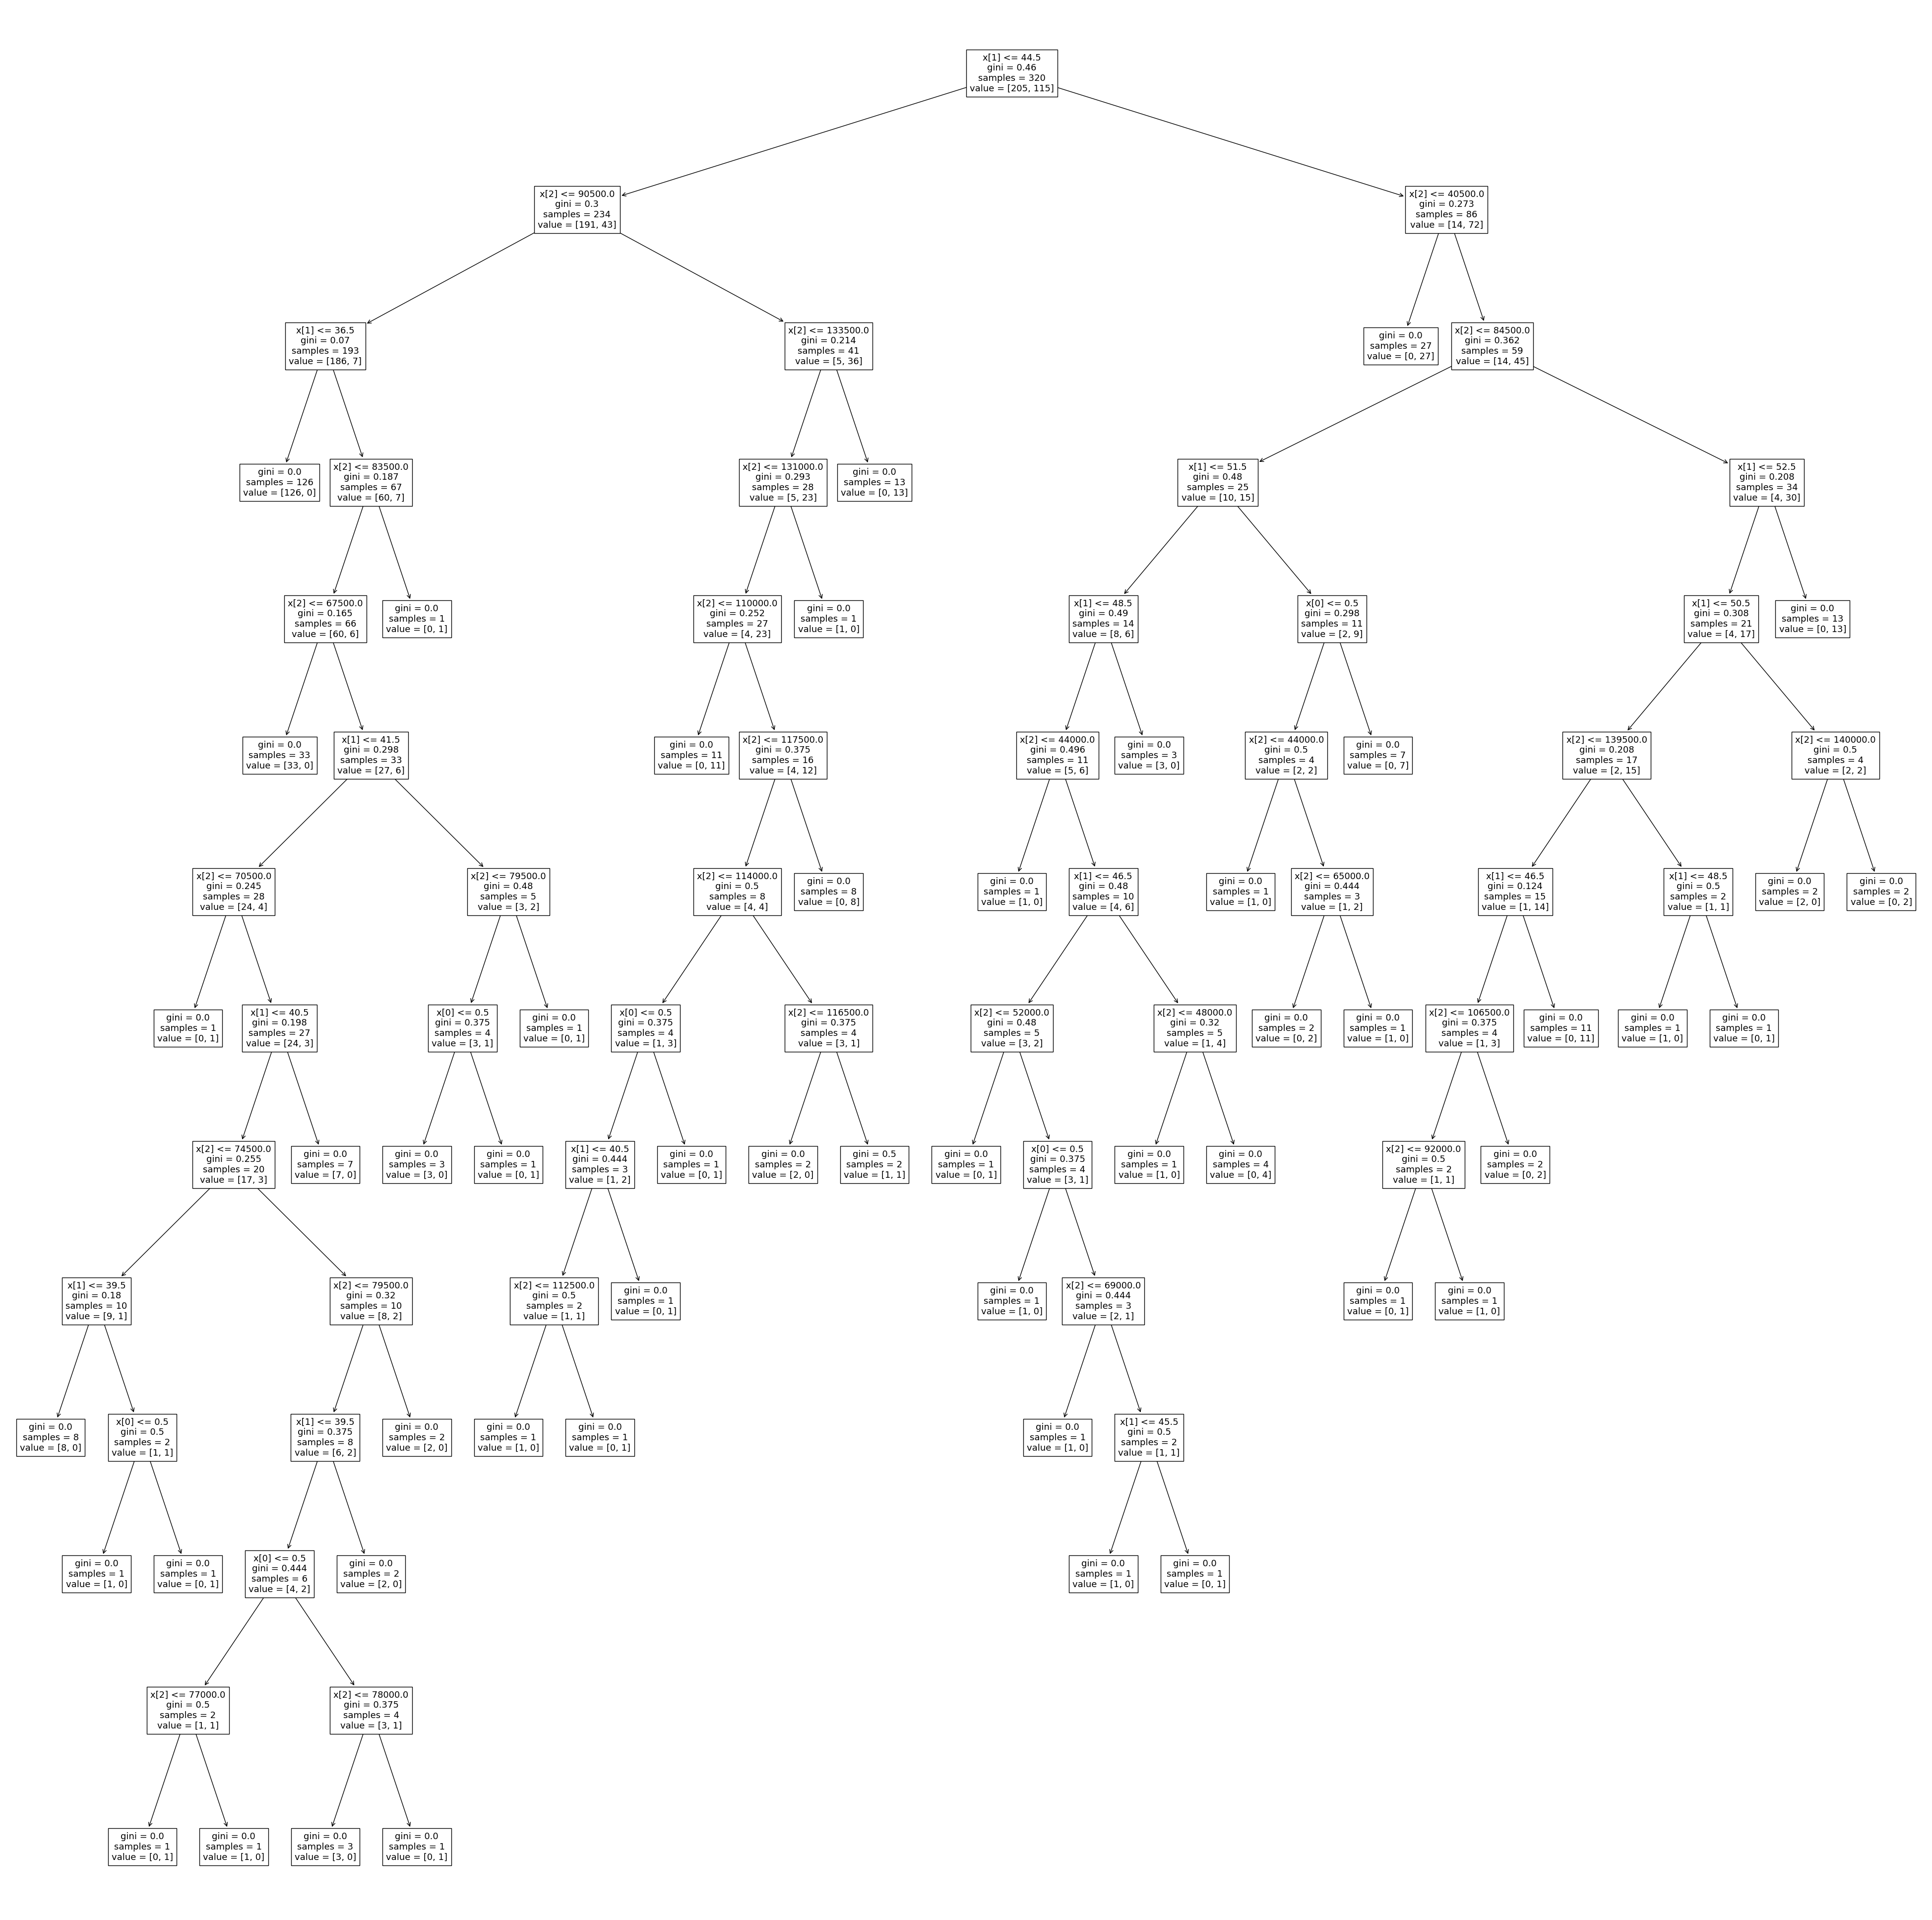

In [122]:
plt.figure(figsize=(50,50))
plot_tree(dt)
plt.savefig("netwrok.jpg")
plt.show()

In [130]:
dt1 = DecisionTreeClassifier(criterion='entropy')

# here entropy is used

In [131]:
dt1.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy')

In [133]:
dt1.score(x_test, y_test)*100

# not much difference found

83.75

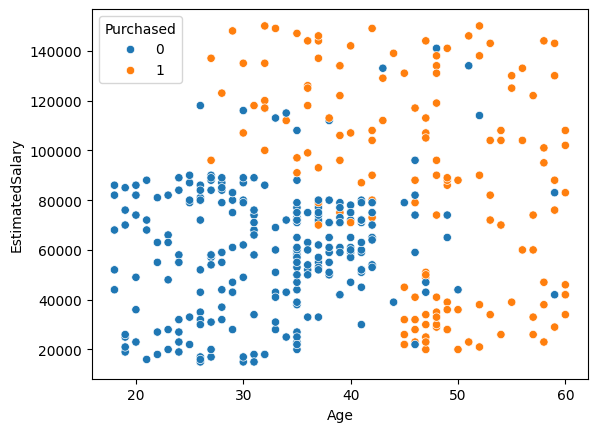

In [134]:
sns.scatterplot(x="Age" , y="EstimatedSalary" , data=df , hue="Purchased")
plt.show()

In [135]:
from mlxtend.plotting import decision_regions , plot_decision_regions

In [146]:
#   here the error has occured so i have to retrained it lable wise and then ploat the graph

c:\Users\HP\healthcare\noman\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


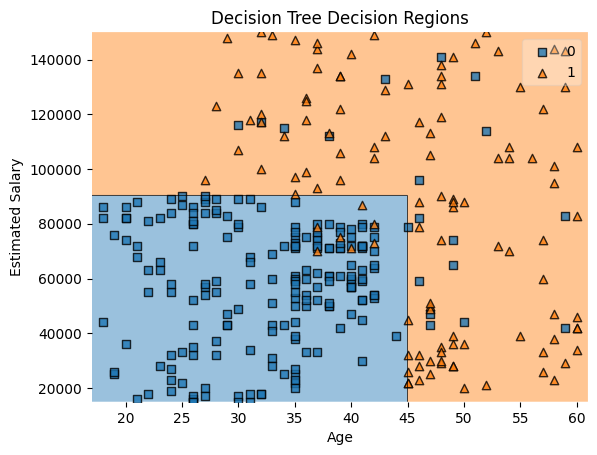

In [157]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Select only 'Age' and 'EstimatedSalary' for visualization
X_selected = data_cleaned[['Age', 'EstimatedSalary']]

# Split the data into training and test sets
x_train_selected, x_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Fit the model on the selected features
dt_selected = DecisionTreeClassifier(max_depth=3)
dt_selected.fit(x_train_selected, y_train)


# Plot decision regions
plot_decision_regions(x_train_selected.to_numpy(), y_train.to_numpy(), clf=dt_selected)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Decision Tree Decision Regions')
plt.show()


In [155]:
dt_selected.score(x_train_selected, y_train)*100

91.875

In [156]:
dt_selected.score(x_test_selected, y_test)*100

91.25

In [154]:
for i in range(1,20 ):
    dt2 = DecisionTreeClassifier(max_depth=i)
    dt2.fit(x_train_selected,y_train)
    print(dt2.score(x_train_selected,y_train)  , dt2.score(x_test_selected, y_test),i)

0.821875 0.9 1
0.91875 0.9125 2
0.91875 0.9125 3
0.93125 0.9125 4
0.934375 0.9 5
0.95 0.8625 6
0.96875 0.85 7
0.971875 0.85 8
0.98125 0.85 9
0.984375 0.85 10
0.990625 0.8375 11
0.990625 0.8375 12
0.996875 0.8375 13
0.996875 0.8375 14
0.996875 0.8375 15
0.996875 0.8375 16
0.996875 0.8375 17
0.996875 0.8375 18
0.996875 0.8375 19
